# Cleaning Our NBA DATA

In [2320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2321]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [2322]:
# read in per game data from csv folder
df = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv', header = 0)

In [2323]:
df.head(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [2324]:
df.tail(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [2325]:
df.sample(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
831,426,1997-98,74,31.0,23.1,1.7,3.5,0.496,0.0,0.0,...,0.9,1.6,0.580,2.8,3.7,0.4,0.8,0.6,0.3,4.4
7335,101133,2012-13,80,26.0,16.5,1.9,4.1,0.453,0.0,0.0,...,1.3,2.1,0.608,1.4,2.5,0.3,1.2,0.5,0.8,5.0
10455,1626209,2018-19,58,24.0,20.8,3.3,8.0,0.412,0.7,2.6,...,1.5,2.0,0.763,0.5,3.6,1.5,1.5,1.0,0.1,8.8
2964,988,2002-03,2,28.0,5.9,1.0,2.0,0.500,0.0,0.0,...,1.0,1.0,1.000,0.0,0.0,0.5,0.0,0.0,0.0,3.0
10231,1627738,2018-19,9,22.0,13.2,1.7,2.4,0.682,0.0,0.1,...,0.7,1.1,0.600,1.1,2.9,0.6,0.3,0.3,0.6,4.0
9152,1626191,2016-17,16,22.0,5.0,1.0,2.0,0.500,0.1,0.4,...,0.2,0.3,0.600,0.6,0.6,0.1,0.2,0.1,0.1,2.3
762,121,1997-98,26,35.0,32.6,7.8,15.5,0.504,0.0,0.1,...,5.2,7.2,0.720,2.3,7.9,1.1,3.0,0.6,2.2,20.8
8008,203493,2013-14,43,23.0,9.2,1.0,2.8,0.355,0.5,1.7,...,0.2,0.2,0.778,0.3,1.0,0.3,0.3,0.2,0.0,2.7
3200,224,2003-04,81,32.0,37.0,5.8,14.3,0.409,2.2,5.9,...,3.4,4.1,0.835,0.5,3.3,3.2,1.6,1.1,0.4,17.3
6422,201949,2010-11,38,24.0,21.6,2.8,6.2,0.456,0.2,0.9,...,1.2,1.9,0.662,1.0,2.8,2.3,1.7,0.9,1.0,7.1


In [2326]:
list(df)

['player_id',
 'listed_season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [2327]:
df_cleaned = df.dropna(how='all')

In [2328]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [2329]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)

In [2330]:
min_gp

-22.712012335693153

<Axes: >

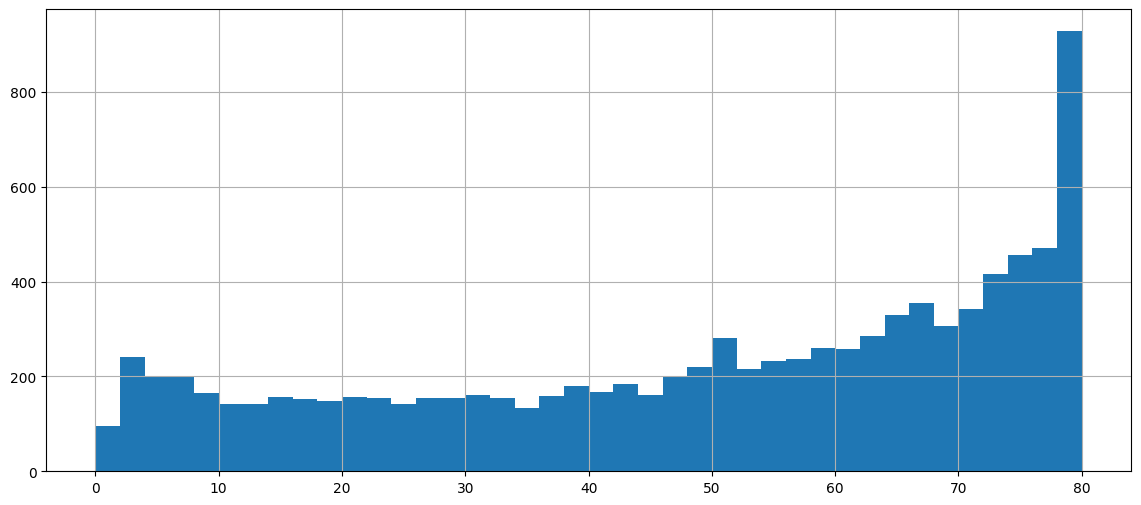

In [2331]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])

In [2332]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [2333]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x - y)

971


# Noramlizing Data Across Seasons

In [2334]:
season = (df_filter['listed_season_id'] == '2017-18')

In [2335]:
df_2018 =df_filter[season]

In [2336]:
df_2018.sample(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10020,1627885,2017-18,23,24.0,16.7,2.6,5.4,0.476,0.3,1.1,...,1.2,1.7,0.737,0.4,2.3,2.4,1.0,1.1,0.3,6.6
9805,1626170,2017-18,74,25.0,22.8,2.8,6.8,0.416,0.8,2.5,...,1.9,2.5,0.745,0.4,1.9,4.6,1.2,0.9,0.1,8.4
10064,203584,2017-18,79,26.0,20.5,2.9,7.3,0.403,2.3,5.8,...,0.7,0.8,0.875,0.2,1.5,0.6,0.7,0.3,0.1,8.9
9640,202332,2017-18,21,29.0,2.3,0.2,0.7,0.333,0.0,0.0,...,0.1,0.3,0.333,0.1,0.6,0.1,0.0,0.1,0.0,0.6
9571,202329,2017-18,69,27.0,30.0,3.3,8.4,0.395,1.8,4.9,...,0.9,1.2,0.738,1.4,6.2,1.2,1.1,1.1,0.6,9.3
9789,1626185,2017-18,73,24.0,22.7,3.0,6.8,0.446,0.5,1.3,...,1.2,1.6,0.767,1.3,3.0,1.0,1.2,0.5,0.7,7.7
9589,203952,2017-18,82,23.0,36.3,6.9,15.9,0.438,1.4,4.1,...,2.5,3.8,0.643,1.0,3.4,2.0,1.7,1.1,0.6,17.7
9696,203079,2017-18,30,26.0,30.6,5.4,13.7,0.398,1.7,5.7,...,1.7,2.3,0.739,0.3,2.3,3.8,2.3,0.8,0.3,14.3
9574,1628409,2017-18,20,23.0,11.2,1.4,3.7,0.378,0.9,2.9,...,0.4,0.5,0.800,0.4,1.5,0.6,0.2,0.1,0.1,4.1
9809,201975,2017-18,77,30.0,14.5,2.0,5.1,0.399,0.9,2.7,...,1.3,1.5,0.863,0.2,1.4,0.9,0.5,0.4,0.1,6.3


In [2337]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\2213054474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [2338]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [2339]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [2340]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [2341]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [2342]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [2343]:
df_2018_norm = vorp(df_2018)

C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\2513203259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalize(df[col_name])
C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\2513203259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalize(df[col_name])
C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\2513203259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [2344]:
df_2018_norm.sample(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9586,101106,2017-18,24,33.0,9.0,0.7,1.0,0.680,0.0,0.0,...,0.000000,0.00,0.011494,0.009901,0.215686,0.186916,0.058252,0.083333,0.16,0.192308
9706,2730,2017-18,81,32.0,30.4,6.2,11.2,0.555,0.0,0.1,...,0.000000,0.01,0.471264,0.712871,0.607843,0.850467,0.126214,0.250000,0.52,0.615385
10079,203506,2017-18,75,26.0,34.0,8.5,17.9,0.477,2.1,5.8,...,0.500000,0.58,0.448276,0.485149,0.117647,0.411215,0.417476,1.000000,0.58,0.307692
9600,1628389,2017-18,69,20.0,19.8,2.5,4.9,0.512,0.0,0.1,...,0.000000,0.01,0.218391,0.257426,0.333333,0.336449,0.145631,0.208333,0.20,0.230769
10080,1713,2017-18,58,41.0,17.7,2.0,4.9,0.403,1.0,2.8,...,0.238095,0.28,0.057471,0.059406,0.058824,0.186916,0.116505,0.291667,0.12,0.153846
10029,1628425,2017-18,54,23.0,14.4,1.5,3.8,0.400,0.6,1.7,...,0.142857,0.17,0.045977,0.039604,0.098039,0.177570,0.048544,0.250000,0.10,0.076923
9911,201158,2017-18,80,32.0,24.3,4.2,9.6,0.441,1.9,4.9,...,0.452381,0.49,0.218391,0.198020,0.058824,0.130841,0.184466,0.333333,0.24,0.076923
9851,203994,2017-18,79,23.0,26.4,6.1,12.0,0.505,0.0,0.1,...,0.000000,0.01,0.252874,0.346535,0.470588,0.598131,0.174757,0.333333,0.46,0.538462
9673,202732,2017-18,58,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.071429,0.09,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.06,0.076923
9632,1628429,2017-18,13,23.0,2.9,0.2,1.1,0.143,0.1,0.6,...,0.023810,0.06,0.011494,0.019802,0.000000,0.000000,0.009709,0.041667,0.02,0.000000


In [2345]:
grouped = df_filter.groupby('listed_season_id')
grouped['pts'].mean()

listed_season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [2346]:
df_new = df_filter.groupby(['listed_season_id']).apply(vorp)
df_new.sample(10)

C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\508324782.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df_filter.groupby(['listed_season_id']).apply(vorp)


player_id listed_season_id  gp   age   min  fgm   fga  \
listed_season_id                                                               
2017-18          9718     201569          2017-18  69  29.0  31.2  6.0  14.1   
2007-08          5027       2400          2007-08  69  26.0  30.8  4.8  10.7   
2000-01          1868       2128          2000-01  22  28.0  18.6  2.1   5.0   
2004-05          3808       2605          2004-05  60  24.0  23.6  3.7   8.4   
2013-14          8022     101179          2013-14  31  31.0  12.2  0.9   3.0   
2008-09          5438       2563          2008-09  79  28.0  18.0  1.9   4.3   
                 5623     200776          2008-09  48  24.0  18.5  2.2   5.1   
2003-04          3322       2254          2003-04  38  26.0  13.2  1.2   2.5   
1999-00          1466       1863          1999-00  26  24.0  10.1  2.2   4.5   
2017-18          9886    1626204          2017-18  66  25.0  21.5  3.6   6.3   

                       fg_pct  fg3m  fg3a  ...  fg3m_norm  fg3a_norm  \
listed_season_id                           ...                         
2017-18          9718   0.428   3.2   8.8  ...   0.761905   0.880000   
2007-08          5027   0.449   0.0   0.1  ...   0.000000   0.013699   
2000-01          1868   0.418   0.0   0.3  ...   0.000000   0.040541   
2004-05          3808   0.437   0.1   0.6  ...   0.034483   0.075000   
2013-14          8022   0.304   0.3   1.4  ...   0.090909   0.177215   
2008-09          5438   0.458   0.1   0.2  ...   0.035714   0.028571   
                 5623   0.425   0.3   0.6  ...   0.107143   0.085714   
2003-04          3322   0.458   0.0   0.0  ...   0.000000   0.000000   
1999-00          1466   0.483   0.3   0.8  ...   0.136364   0.126984   
2017-18          9886   0.581   0.0   0.2  ...   0.000000   0.020000   

                       ftm_norm  fta_norm  oreb_norm  dreb_norm  ast_norm  \
listed_season_id                                                            
2017-18          9718  0.321839  0.346535   0.078431   0.177570  0.213592   
2007-08          5027  0.280488  0.284404   0.609756   0.547170  0.103448   
2000-01          1868  0.168675  0.175573   0.170732   0.086957  0.306122   
2004-05          3808  0.183908  0.209524   0.384615   0.201923  0.182609   
2013-14          8022  0.034483  0.040404   0.055556   0.095745  0.196262   
2008-09          5438  0.155556  0.177570   0.162791   0.115789  0.090909   
                 5623  0.066667  0.093458   0.139535   0.136842  0.209091   
2003-04          3322  0.125000  0.138614   0.369565   0.157407  0.032609   
1999-00          1466  0.093333  0.077670   0.093023   0.039216  0.178218   
2017-18          9886  0.160920  0.207921   0.470588   0.392523  0.116505   

                       stl_norm  tov_norm  blk_norm  
listed_season_id                                     
2017-18          9718  0.250000  0.380000  0.153846  
2007-08          5027  0.259259  0.409091  0.222222  
2000-01          1868  0.375000  0.414634  0.027027  
2004-05          3808  0.482759  0.304348  0.060606  
2013-14          8022  0.320000  0.189189  0.035714  
2008-09          5438  0.214286  0.210526  0.068966  
                 5623  0.214286  0.289474  0.068966  
2003-04          3322  0.125000  0.139535  0.138889  
1999-00          1466  0.185185  0.153846  0.000000  
2017-18          9886  0.541667  0.160000  0.230769  

[10 rows x 35 columns]

# Distance Function

In [2347]:
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [2348]:
df1 = pd.read_csv('../nba_csv/player_id_player_name.csv')

In [2349]:
df2 = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'listed_season_id', 'pts'])

In [2350]:
df1.sample(5)

,player_id,player_name
129,202700,Donatas Motiejunas
71,1626184,Chasson Randle
94,201967,Dante Cunningham
256,203994,Jusuf Nurkic
111,1627749,Dejounte Murray


In [2351]:
df2.sample(5)

,player_id,listed_season_id,pts
5690,2446,2008-09,11.2
915,989,1998-99,2.1
4383,1536,2005-06,16.4
1397,685,1999-00,3.0
6652,2566,2010-11,9.2


In [2352]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [2353]:
df3.sample(5)

,player_id,player_name,listed_season_id,pts
2403,1627861,Mike Tobey,2016-17,1.0
475,2546,Carmelo Anthony,2012-13,28.7
1307,203109,Jae Crowder,2013-14,4.6
420,1627854,Bryn Forbes,2016-17,2.6
1913,1627739,Kris Dunn,2018-19,11.3


In [2354]:
df_2019 = df3[df3['listed_season_id'] == '2018-19']

In [2355]:
df_2019.sample(5)

,player_id,player_name,listed_season_id,pts
2141,1627736,Malik Beasley,2018-19,11.3
1678,202685,Jonas Valanciunas,2018-19,15.6
549,203991,Clint Capela,2018-19,16.6
845,1626164,Devin Booker,2018-19,26.6
1910,201585,Kosta Koufos,2018-19,3.7


In [2356]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [2357]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [2358]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [2359]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [2360]:
calc_distance(curry_ppg, dame_ppg)

1.5

# Find Player Function

In [2361]:
nba_stats = {'first_name': ['Lebron', 'Kyle', 'Lonzo', 'Brandon', 'Josh', 'Lance', 'Michael', 'Tyson', 'Ivica'], 
        'last_name': ['James', 'Kuzma', 'Ball', 'Ingram', 'Hart', 'Stephenson', 'Beasley', 'Chander', 'Zubac'], 
        'ppg': [28.2, 21.1, 14.3, 17.2, 18.2, 11.2, 14.2, 4.5, 6.7], 
        'apg': [12.3, 2.1, 8.9, 2.5, 3.6, 0.2, 1.8, 1.9, 1.5],
        'rpg': [7.1, 5.4, 5.5, 8.1, 3.2, 5.5, 7.7, 2.3, 8.1]}
laker_df = pd.DataFrame(nba_stats, columns = ['first_name', 'last_name', 'ppg', 'apg', 'rpg'])

In [2362]:
for row in laker_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Lebron James 28.2
Kyle Kuzma 21.1
Lonzo Ball 14.3
Brandon Ingram 17.2
Josh Hart 18.2
Lance Stephenson 11.2
Michael Beasley 14.2
Tyson Chander 4.5
Ivica Zubac 6.7


In [2363]:
# read in per game data from csv folder
dataframe = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv', header = 0)

In [2364]:
df_example = dataframe.sample(10)

In [2365]:
for row in df_example.itertuples():
    print(row.listed_season_id, row.player_id)

2017-18 1628935
1997-98 685
2011-12 202707
2015-16 201585
2004-05 2730
2010-11 201566
2014-15 2732
2018-19 1629109
2001-02 2091
1996-97 1131


In [2366]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.listed_season_id and player_id == row.player_id:
            return row

In [2367]:
df_example

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9566,1628935,2017-18,1,32.0,34.5,3.0,9.0,0.333,1.0,4.0,...,1.0,2.0,0.500,2.0,1.0,1.0,1.0,0.0,0.0,8.0
518,685,1997-98,79,25.0,21.6,2.8,5.7,0.499,0.0,0.0,...,1.4,2.1,0.651,1.8,3.8,0.7,0.8,0.5,1.1,7.1
6877,202707,2011-12,36,23.0,8.3,1.5,3.4,0.446,0.0,0.0,...,0.2,0.3,0.667,0.6,1.1,0.2,0.4,0.1,0.4,3.2
8875,201585,2015-16,78,27.0,19.0,3.0,5.7,0.532,0.0,0.0,...,0.7,1.3,0.548,2.2,3.3,0.4,0.6,0.5,0.9,6.8
3644,2730,2004-05,82,19.0,32.7,4.3,8.3,0.520,0.0,0.0,...,3.4,5.0,0.671,3.5,6.5,0.9,2.0,0.9,1.7,12.0
6605,201566,2010-11,82,22.0,34.7,7.5,17.0,0.442,0.4,1.3,...,6.5,7.7,0.842,1.5,3.1,8.2,3.9,1.9,0.4,21.9
8148,2732,2014-15,56,32.0,14.1,2.3,5.3,0.437,0.6,1.7,...,1.0,1.2,0.836,0.1,1.0,0.9,1.0,0.3,0.0,6.2
10274,1629109,2018-19,51,24.0,12.6,1.0,3.0,0.331,0.8,2.7,...,0.1,0.1,1.000,0.5,1.8,0.4,0.1,0.4,0.5,2.9
2296,2091,2001-02,3,26.0,8.1,1.3,2.7,0.500,0.0,0.0,...,0.0,0.0,0.000,0.0,2.3,0.7,0.7,0.0,0.3,2.7
226,1131,1996-97,4,27.0,5.2,0.5,0.8,0.667,0.0,0.0,...,0.3,0.3,1.000,0.0,1.0,0.0,0.3,0.0,0.5,1.3


In [2368]:
find_player(201151, '2007-08')

In [2369]:
find_player(201151, '2021-22')

In [2370]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.listed_season_id and player_id == row.player_id:
            return row

In [2371]:
dataframe.dtypes

player_id             int64
listed_season_id     object
gp                    int64
age                 float64
min                 float64
fgm                 float64
fga                 float64
fg_pct              float64
fg3m                float64
fg3a                float64
fg3_pct             float64
ftm                 float64
fta                 float64
ft_pct              float64
oreb                float64
dreb                float64
ast                 float64
tov                 float64
stl                 float64
blk                 float64
pts                 float64
dtype: object

In [2372]:
player = 2544
season = '2012-13'

In [2373]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, listed_season_id='2012-13', gp=76, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity

In [2374]:
current_player_season = '2016-17'
current_player_id = 201950

In [2375]:
# read in per game data from csv folder
df = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv', header = 0)

In [2376]:
df_cleaned = df.dropna(how='all')

In [2377]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [2378]:
cols_to_norm = ['pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk']

In [2379]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [2380]:
df_norm = df_filter.groupby(['listed_season_id']).apply(vorp)

C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\358000333.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_norm = df_filter.groupby(['listed_season_id']).apply(vorp)


In [2381]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['listed_season_id'] == current_player_season), 
             'pts_norm']).item()

In [2382]:
jrue_pts_norm

0.474025974025974

In [2383]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'blk_norm']).item()
]

In [2384]:
print(current_player_stats)

[0.474025974025974, 0.8530259365994238, 0.5742574257425742, 0.5387931034482759, 0.3658536585365854, 0.42000000000000004, 0.1956521739130435, 0.2293577981651376, 0.1627906976744186, 0.30693069306930687, 0.6486486486486487, 0.75, 0.49999999999999994, 0.2692307692307692]


In [2385]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['listed_season_id'] == current_player_season), 'blk_norm']).item()
])

In [2386]:
current_player_vector

array([0.47402597, 0.85302594, 0.57425743, 0.5387931 , 0.36585366,
       0.42      , 0.19565217, 0.2293578 , 0.1627907 , 0.30693069,
       0.64864865, 0.75      , 0.5       , 0.26923077])

In [2387]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [2388]:
compared_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['listed_season_id'] == compared_player_season), 'blk_norm']).item()
])

In [2389]:
compared_player_vector

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [2390]:
vfunc = np.vectorize(calc_distance)

In [2391]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [2392]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [2393]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [2394]:
number

0.25374793324911765

# Comparing Multiple Players in a For Loop

In [2395]:
player_distance = []

In [2396]:
df_sample = df_norm.sample(10)

In [2397]:
df_sample.head(10)

,,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
listed_season_id,,,,,,,,,,,,,,,,,,,,,,
2015-16,8626,203094,2015-16,56,26.0,14.7,2.6,5.5,0.471,0.7,2.0,...,0.137255,0.178571,0.102273,0.117647,0.122449,0.270000,0.034188,0.095238,0.152174,0.108108
2000-01,2005,2039,2000-01,76,21.0,16.3,1.9,4.8,0.409,0.4,1.1,...,0.148148,0.148649,0.192771,0.183206,0.024390,0.097826,0.234694,0.166667,0.292683,0.027027
2012-13,7174,2738,2012-13,80,29.0,34.7,5.0,11.0,0.451,1.1,3.6,...,0.314286,0.467532,0.220930,0.333333,0.181818,0.401961,0.486486,0.708333,0.666667,0.233333
2000-01,2054,1913,2000-01,45,24.0,19.5,0.9,2.0,0.444,0.0,0.0,...,0.000000,0.000000,0.108434,0.129771,0.536585,0.369565,0.091837,0.250000,0.243902,0.216216
2013-14,7753,1717,2013-14,80,36.0,32.9,7.9,15.9,0.497,1.6,4.1,...,0.484848,0.518987,0.482759,0.474747,0.092593,0.585106,0.252336,0.360000,0.378378,0.214286
2007-08,5274,208,2007-08,55,38.0,23.2,4.2,9.7,0.438,0.4,1.4,...,0.133333,0.191781,0.280488,0.238532,0.073171,0.188679,0.336207,0.259259,0.409091,0.027778
2009-10,6103,2403,2009-10,82,27.0,33.6,5.1,8.7,0.587,0.0,0.0,...,0.000000,0.000000,0.391304,0.500000,0.487805,0.568421,0.227273,0.608696,0.394737,0.357143
2004-05,3585,1497,2004-05,80,28.0,35.9,5.1,11.4,0.442,2.1,4.8,...,0.724138,0.600000,0.494253,0.457143,0.153846,0.259615,0.504348,0.344828,0.500000,0.030303
2003-04,3294,383,2003-04,56,36.0,25.2,3.8,9.8,0.392,0.2,0.7,...,0.066667,0.080460,0.250000,0.237624,0.239130,0.203704,0.173913,0.500000,0.325581,0.083333


In [2398]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,
    row.fga_norm,
    row.fg3m_norm,
    row.fg3a_norm,
    row.ftm_norm,
    row.fta_norm,
    row.oreb_norm,
    row.dreb_norm,
    row.ast_norm,
    row.stl_norm,
    row.tov_norm,
    row.blk_norm
    ])

    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 203094. Percent error was 0.2822489113025731
Done with 2039. Percent error was 0.2817621888522311
Done with 2738. Percent error was 0.06738685382259545
Done with 1913. Percent error was 0.3297419020720202
Done with 1717. Percent error was 0.1895577640083259
Done with 208. Percent error was 0.18935749735936216
Done with 2403. Percent error was 0.2087163937303233
Done with 1497. Percent error was 0.15417171201992957
Done with 383. Percent error was 0.1934209942207596
Done with 201961. Percent error was 0.19038620243867546


In [2399]:
player_distance

[0.2822489113025731,
 0.2817621888522311,
 0.06738685382259545,
 0.3297419020720202,
 0.1895577640083259,
 0.18935749735936216,
 0.2087163937303233,
 0.15417171201992957,
 0.1934209942207596,
 0.19038620243867546]

In [2400]:
df_sample['distance'] = player_distance

In [2401]:
ranked_df = df_sample.sort_values('distance')

In [2402]:
ranked_df.head(10)

,,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
listed_season_id,,,,,,,,,,,,,,,,,,,,,,
2012-13,7174,2738,2012-13,80,29.0,34.7,5.0,11.0,0.451,1.1,3.6,...,0.467532,0.220930,0.333333,0.181818,0.401961,0.486486,0.708333,0.666667,0.233333,0.067387
2004-05,3585,1497,2004-05,80,28.0,35.9,5.1,11.4,0.442,2.1,4.8,...,0.600000,0.494253,0.457143,0.153846,0.259615,0.504348,0.344828,0.500000,0.030303,0.154172
2007-08,5274,208,2007-08,55,38.0,23.2,4.2,9.7,0.438,0.4,1.4,...,0.191781,0.280488,0.238532,0.073171,0.188679,0.336207,0.259259,0.409091,0.027778,0.189357
2013-14,7753,1717,2013-14,80,36.0,32.9,7.9,15.9,0.497,1.6,4.1,...,0.518987,0.482759,0.474747,0.092593,0.585106,0.252336,0.360000,0.378378,0.214286,0.189558
2014-15,8588,201961,2014-15,65,27.0,25.8,3.9,9.5,0.412,1.4,3.7,...,0.456790,0.090909,0.098039,0.094340,0.270000,0.148515,0.217391,0.181818,0.000000,0.190386
2003-04,3294,383,2003-04,56,36.0,25.2,3.8,9.8,0.392,0.2,0.7,...,0.080460,0.250000,0.237624,0.239130,0.203704,0.173913,0.500000,0.325581,0.083333,0.193421
2009-10,6103,2403,2009-10,82,27.0,33.6,5.1,8.7,0.587,0.0,0.0,...,0.000000,0.391304,0.500000,0.487805,0.568421,0.227273,0.608696,0.394737,0.357143,0.208716
2000-01,2005,2039,2000-01,76,21.0,16.3,1.9,4.8,0.409,0.4,1.1,...,0.148649,0.192771,0.183206,0.024390,0.097826,0.234694,0.166667,0.292683,0.027027,0.281762
2015-16,8626,203094,2015-16,56,26.0,14.7,2.6,5.5,0.471,0.7,2.0,...,0.178571,0.102273,0.117647,0.122449,0.270000,0.034188,0.095238,0.152174,0.108108,0.282249


In [2403]:
df1 = pd.read_csv('../nba_csv/player_info.csv')

In [2404]:
#getting error of listed_season being an index and column label, so will do following: 
if 'listed_season_id' in ranked_df.columns:
    ranked_df = ranked_df.drop(columns=['listed_season_id'])

ranked_df = ranked_df.reset_index()  # This will move 'listed_season_id' from index to a regular column

In [2405]:
df_final = pd.merge(ranked_df, df1, on=['player_id', 'listed_season_id'], how='left').drop_duplicates()

In [2406]:
df_final = df_final[['player_name', 'player_id', 'listed_season_id', 'distance']]

In [2407]:
df_final

,player_name,player_id,listed_season_id,distance
0,Andre Iguodala,2738,2012-13,0.067387
3,Chauncey Billups,1497,2004-05,0.154172
6,Sam Cassell,208,2007-08,0.189357
9,Dirk Nowitzki,1717,2013-14,0.189558
12,Wayne Ellington,201961,2014-15,0.190386
15,Kendall Gill,383,2003-04,0.193421
18,Nene,2403,2009-10,0.208716
21,Keyon Dooling,2039,2000-01,0.281762
24,Andrew Nicholson,203094,2015-16,0.282249
27,Michael Ruffin,1913,2000-01,0.329742


# Weighting Stat Projections

In [2408]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [2409]:
season_id = season_list[18]
print(season_id)

2014-15


In [2410]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [2411]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [2412]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [2413]:
ranked_df.head(10)

,listed_season_id,level_1,player_id,gp,age,min,fgm,fga,fg_pct,fg3m,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
0,2012-13,7174,2738,80,29.0,34.7,5.0,11.0,0.451,1.1,...,0.467532,0.220930,0.333333,0.181818,0.401961,0.486486,0.708333,0.666667,0.233333,0.067387
1,2004-05,3585,1497,80,28.0,35.9,5.1,11.4,0.442,2.1,...,0.600000,0.494253,0.457143,0.153846,0.259615,0.504348,0.344828,0.500000,0.030303,0.154172
2,2007-08,5274,208,55,38.0,23.2,4.2,9.7,0.438,0.4,...,0.191781,0.280488,0.238532,0.073171,0.188679,0.336207,0.259259,0.409091,0.027778,0.189357
3,2013-14,7753,1717,80,36.0,32.9,7.9,15.9,0.497,1.6,...,0.518987,0.482759,0.474747,0.092593,0.585106,0.252336,0.360000,0.378378,0.214286,0.189558
4,2014-15,8588,201961,65,27.0,25.8,3.9,9.5,0.412,1.4,...,0.456790,0.090909,0.098039,0.094340,0.270000,0.148515,0.217391,0.181818,0.000000,0.190386
5,2003-04,3294,383,56,36.0,25.2,3.8,9.8,0.392,0.2,...,0.080460,0.250000,0.237624,0.239130,0.203704,0.173913,0.500000,0.325581,0.083333,0.193421
6,2009-10,6103,2403,82,27.0,33.6,5.1,8.7,0.587,0.0,...,0.000000,0.391304,0.500000,0.487805,0.568421,0.227273,0.608696,0.394737,0.357143,0.208716
7,2000-01,2005,2039,76,21.0,16.3,1.9,4.8,0.409,0.4,...,0.148649,0.192771,0.183206,0.024390,0.097826,0.234694,0.166667,0.292683,0.027027,0.281762
8,2015-16,8626,203094,56,26.0,14.7,2.6,5.5,0.471,0.7,...,0.178571,0.102273,0.117647,0.122449,0.270000,0.034188,0.095238,0.152174,0.108108,0.282249
9,2000-01,2054,1913,45,24.0,19.5,0.9,2.0,0.444,0.0,...,0.000000,0.108434,0.129771,0.536585,0.369565,0.091837,0.250000,0.243902,0.216216,0.329742


In [2414]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [2415]:
test_df = ranked_df.iloc[0]

In [2416]:
weight = (1 / test_df.distance)
print(weight)

14.839689691295405


In [2417]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [2418]:
projected_stats = {}

In [2419]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['porj_' + col] = (sum_stat / weight)

In [2420]:
projected_stats

{'porj_pts': 13.0,
 'porj_min': 34.7,
 'porj_fgm': 5.0,
 'porj_fga': 11.0,
 'porj_fg3m': 1.1,
 'porj_fg3a': 3.6,
 'porj_ftm': 1.9,
 'porj_fta': 3.4,
 'porj_oreb': 1.0,
 'porj_dreb': 4.3,
 'porj_ast': 5.4,
 'porj_stl': 1.7,
 'porj_tov': 2.6,
 'porj_blk': 0.7}

In [2421]:
projected_stats = {}

In [2422]:
sum_stat = 0
sum_weight = 0

In [2423]:
for row in ranked_df.itertuples():
    weight = (1 / (row.distance + 0.0001))
    sum_stat += row.pts * weight
    sum_weight += weight

In [2424]:
proj_points = (sum_stat / sum_weight)

In [2425]:
proj_points

12.147346159967382

In [2426]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [2427]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 12.147849760087684,
 'proj_min': 28.656117256144586,
 'proj_fgm': 4.445667574010137,
 'proj_fga': 9.736326928232902,
 'proj_fg3m': 0.9224802010852311,
 'proj_fg3a': 2.5798771852424762,
 'proj_ftm': 2.3198270699513084,
 'proj_fta': 3.1480616137672293,
 'proj_oreb': 0.8738372712190589,
 'proj_dreb': 3.539612089290108,
 'proj_ast': 3.382643955797339,
 'proj_stl': 1.0538519586487378,
 'proj_tov': 1.7447497971761035,
 'proj_blk': 0.4416257748797173}

# Getting Weighted Average Using Multiple Players Next Season

In [2428]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iloc[1:11].iterrows():
        if row.listed_season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(row.listed_season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        if player_next_season == None:
            continue
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / (sum_weight + 0.0001 ))

# Player Comparison Tool

In [2429]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [2430]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    return projected_stats

In [2431]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    return projected_stats

In [2432]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
        
    return projected_stats

In [2433]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.listed_season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.listed_season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats




In [2434]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['listed_season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.listed_season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['listed_season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.listed_season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.listed_season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.listed_season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / (sum_weight + 0.0001) )
        
    return projected_stats




# Projecting 2018-19 Season Stats

In [2435]:
ten_players = [201935,
             203081,
             201942,
             201937,
             202339,
             203496,
             203497,
             201567,
             202331,
             202691]

In [2436]:
current_player_season = '2017-18'

In [2437]:
final_projections = []

In [2438]:
# read in per game data from csv folder
df = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv', header = 0)

In [2439]:
df_new = df[df.listed_season_id != '2018-19']

In [2440]:
df_new.sample(10)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
4911,1889,2007-08,82,32.0,36.8,6.9,14.1,0.492,0.0,0.4,...,3.1,4.1,0.772,1.2,2.8,6.9,2.5,1.3,0.1,17.0
9883,202498,2017-18,73,30.0,18.5,1.4,3.7,0.382,0.7,1.7,...,0.6,0.7,0.830,0.6,1.8,0.6,0.6,0.4,0.2,4.1
3045,1607,2002-03,79,27.0,32.9,5.2,12.1,0.428,1.2,3.4,...,2.6,2.9,0.900,0.5,1.8,5.7,2.3,0.8,0.1,14.2
3954,452,2004-05,27,33.0,7.5,0.5,1.6,0.310,0.0,0.0,...,0.3,0.6,0.529,0.6,0.8,0.4,0.6,0.1,0.1,1.3
2786,2436,2002-03,14,23.0,4.5,0.8,2.2,0.355,0.0,0.4,...,0.4,0.6,0.625,0.0,0.3,0.4,0.6,0.3,0.0,1.9
8158,101138,2014-15,82,30.0,23.5,4.2,8.3,0.504,0.1,0.4,...,2.1,2.6,0.790,1.7,3.2,1.3,1.0,0.5,0.4,10.6
7937,201578,2013-14,79,26.0,12.4,2.5,5.6,0.441,0.1,0.4,...,1.4,1.7,0.821,1.3,2.4,0.4,0.8,0.1,0.4,6.4
8932,203101,2015-16,61,27.0,14.3,2.3,3.8,0.601,0.0,0.0,...,0.6,1.0,0.576,1.5,2.3,0.3,0.7,0.3,0.8,5.1
270,195,1996-97,80,27.0,25.2,1.9,4.6,0.403,1.0,2.8,...,0.4,0.6,0.630,0.4,1.3,4.1,1.1,0.8,0.1,5.1
5611,1766,2008-09,27,33.0,8.0,0.9,1.7,0.543,0.0,0.0,...,0.6,1.0,0.630,0.8,1.1,0.3,0.4,0.2,0.4,2.5


In [2441]:
df_cleaned = df_new.dropna(how='any')

In [2442]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [2443]:
df_final = df_filter.groupby(['listed_season_id']).apply(vorp)

C:\Users\vgeor\AppData\Local\Temp\ipykernel_20700\4094666189.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_filter.groupby(['listed_season_id']).apply(vorp)


In [2444]:
df_final.tail(5)

player_id listed_season_id  gp   age   min  fgm   fga  \
listed_season_id                                                                
2017-18          10098    1628380          2017-18  66  20.0  15.8  1.7   4.4   
                 10099     203897          2017-18  24  23.0  27.3  5.7  14.8   
                 10100       2216          2017-18  59  36.0  25.6  6.1  12.9   
                 10101       2585          2017-18  69  34.0  14.1  2.2   3.8   
                 10102    1627753          2017-18  18  22.0   6.9  0.3   1.8   

                        fg_pct  fg3m  fg3a  ...  fg3m_norm  fg3a_norm  \
listed_season_id                            ...                         
2017-18          10098   0.398   0.5   1.7  ...   0.119048       0.17   
                 10099   0.383   1.8   5.1  ...   0.428571       0.51   
                 10100   0.473   0.9   2.5  ...   0.214286       0.25   
                 10101   0.564   0.0   0.0  ...   0.000000       0.00   
                 10102   0.188   0.1   1.1  ...   0.023810       0.11   

                        ftm_norm  fta_norm  oreb_norm  dreb_norm  ast_norm  \
listed_season_id                                                             
2017-18          10098  0.045977  0.059406   0.137255   0.233645  0.077670   
                 10099  0.413793  0.445545   0.078431   0.308411  0.291262   
                 10100  0.160920  0.178218   0.313725   0.457944  0.213592   
                 10101  0.126437  0.128713   0.254902   0.299065  0.155340   
                 10102  0.045977  0.069307   0.058824   0.065421  0.009709   

                        stl_norm  tov_norm  blk_norm  
listed_season_id                                      
2017-18          10098  0.125000      0.18  0.192308  
                 10099  0.416667      0.36  0.076923  
                 10100  0.291667      0.40  0.076923  
                 10101  0.250000      0.20  0.076923  
                 10102  0.041667      0.12  0.307692  

[5 rows x 35 columns]

In [2445]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [2446]:
# function to calculate distance between two points
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# create a function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.listed_season_id and player_id == row.player_id:
            return row

In [2447]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [2448]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43272673478647,
  'proj_min': 37.27553447323969,
  'proj_fgm': 8.739522899144553,
  'proj_fga': 19.32609367015796,
  'proj_fg3m': 2.441599149773979,
  'proj_fg3a': 6.920863475802326,
  'proj_ftm': 7.523814541283296,
  'proj_fta': 8.988611614074507,
  'proj_oreb': 0.8919009448778845,
  'proj_dreb': 5.167227412678363,
  'proj_ast': 6.767122099530855,
  'proj_stl': 1.5624872839370285,
  'proj_tov': 3.839131944089621,
  'proj_blk': 0.5451221270593088},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.96116206294952,
  'proj_min': 36.33937914627316,
  'proj_fgm': 8.002097804238682,
  'proj_fga': 18.622449246125043,
  'proj_fg3m': 2.1210343771204117,
  'proj_fg3a': 6.107639875942588,
  'proj_ftm': 5.836242576016706,
  'proj_fta': 6.926426759494029,
  'proj_oreb': 0.7750167913974995,
  'proj_dreb': 3.4561259730698106,
  'proj_ast': 5.515006839381213,
  'proj_stl': 1.1604145719606416,
  'proj_tov': 2.8

In [2449]:
test_projections = pd.DataFrame(final_projections)
test_projections

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
0,201935,2018-19,27.432727,37.275534,8.739523,19.326094,2.441599,6.920863,7.523815,8.988612,0.891901,5.167227,6.767122,1.562487,3.839132,0.545122
1,203081,2018-19,23.961162,36.339379,8.002098,18.622449,2.121034,6.107640,5.836243,6.926427,0.775017,3.456126,5.515007,1.160415,2.842699,0.407752
2,201942,2018-19,20.980926,34.625565,7.228282,16.349108,1.107140,3.257625,5.398341,6.510366,0.834225,3.305770,3.592757,1.001175,2.094357,0.252091
3,201937,2018-19,12.041564,28.677690,4.268697,9.623981,1.179709,3.195632,2.374709,2.829799,0.426510,2.570073,4.867846,1.093003,2.196346,0.198423
4,202339,2018-19,15.815514,32.946451,5.598950,12.956189,1.431104,3.886604,3.203012,3.824599,0.557472,3.010687,5.186652,1.367532,2.121439,0.363611
5,203496,2018-19,9.629853,27.479014,3.555026,8.538194,1.410022,3.997719,1.108836,1.534492,0.832775,3.193728,1.940302,1.269755,1.146876,0.421267
6,203497,2018-19,13.598582,33.840070,5.088180,9.676978,0.000000,0.019645,3.412892,5.002983,3.006829,7.376110,1.067470,0.644914,1.971087,2.611177
7,201567,2018-19,16.005462,31.065781,5.537313,12.315322,1.680535,4.407984,3.292165,3.961866,1.789660,6.533113,1.835933,0.752828,1.633218,0.609121
8,202331,2018-19,18.147654,34.587582,6.316555,14.987026,2.392276,6.264712,3.142186,3.895891,0.852092,3.941618,4.347654,1.304939,2.242463,0.388357
9,202691,2018-19,18.061914,32.795499,6.645455,14.856635,2.492968,6.081682,2.279071,2.726846,0.517293,3.057178,2.534955,0.871288,1.582274,0.404176


In [2450]:
df_names = pd.read_csv('../nba_csv/player_id_player_name.csv')

test projections df only was printing projections, merging with per game data to use in measuring model area (testing this)

In [2451]:
test_test = pd.read_csv('../nba_csv/player_general_traditional_per_game_data.csv')
test_stat_df = pd.merge(test_test, test_projections, left_on=['player_id'], right_on=['player_id'], how='inner')

test_stat_df = round(test_stat_df, 1)
test_stat_df

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
0,201567,2008-09,81,20.0,25.3,3.9,8.5,0.5,0.0,0.2,...,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6
1,201942,2009-10,77,20.0,21.6,3.3,6.6,0.5,0.1,0.2,...,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3
2,201935,2009-10,76,20.0,22.9,3.1,7.6,0.4,1.2,3.3,...,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5
3,201567,2009-10,60,21.0,28.6,4.9,10.8,0.4,0.6,1.8,...,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6
4,201942,2010-11,82,21.0,34.8,6.6,14.1,0.5,0.1,0.6,...,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,202691,2018-19,78,29.0,34.0,8.4,18.0,0.5,3.1,7.7,...,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4
80,202331,2018-19,77,28.0,36.9,9.2,21.0,0.4,3.8,9.8,...,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4
81,201937,2018-19,68,28.0,27.9,4.3,10.7,0.4,1.2,3.7,...,1.2,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2
82,203496,2018-19,35,28.0,34.4,4.5,10.3,0.4,2.4,6.4,...,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4


In [2452]:
final_stat_df = pd.merge(test_stat_df, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [2453]:
round(final_stat_df,1)

,player_id,listed_season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201567,2008-09,81,20.0,25.3,3.9,8.5,0.5,0.0,0.2,...,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
1,201942,2009-10,77,20.0,21.6,3.3,6.6,0.5,0.1,0.2,...,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
2,201935,2009-10,76,20.0,22.9,3.1,7.6,0.4,1.2,3.3,...,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
3,201567,2009-10,60,21.0,28.6,4.9,10.8,0.4,0.6,1.8,...,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
4,201942,2010-11,82,21.0,34.8,6.6,14.1,0.5,0.1,0.6,...,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,202691,2018-19,78,29.0,34.0,8.4,18.0,0.5,3.1,7.7,...,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson
80,202331,2018-19,77,28.0,36.9,9.2,21.0,0.4,3.8,9.8,...,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
81,201937,2018-19,68,28.0,27.9,4.3,10.7,0.4,1.2,3.7,...,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2,Ricky Rubio
82,203496,2018-19,35,28.0,34.4,4.5,10.3,0.4,2.4,6.4,...,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington


In [2454]:
player_df = pd.read_csv('../nba_csv/player_info.csv')

In [2455]:
player_filter = player_df[player_df['listed_season_id'] == '2017-18']

In [2456]:
player_ids_2018 = player_filter['player_id'].tolist()

In [2457]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [2458]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201166 for season 2018-19
Projecting player_id 203932 for season 2018-19
Can't find player with id 1626151 and season 2017-18
Can't find player with id 1628935 and season 2017-18
Projecting player_id 1627846 for season 2018-19
Can't find player with id 203940 and season 2017-18
Projecting player_id 201143 for season 2018-19
Projecting player_id 2744 for season 2018-19
Projecting player_id 202329 for season 2018-19
Can't find player with id 1626210 and season 2017-18
Projecting player_id 202692 for season 2018-19
Projecting player_id 1628409 for season 2018-19
Projecting player_id 203518 for season 2018-19
Projecting player_id 1627936 for season 2018-19
Projecting player_id 203458 for season 2018-19
Projecting player_id 1627816 for season 2018-19
Projecting player_id 1628035 for season 2018-19
Projecting player_id 203459 for season 2018-19
Projecting player_id 101161 for season 2018-19
Projecting player_id 203083 for season 2018-19
Projecting player_id 2738 for seas

In [2459]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [2460]:
player_info = final_stat_df[player_info_columns]

In [2461]:
final_stat_df.to_csv('../nba_csv/player_proj_df.csv', index=False)
player_info.to_csv('../nba_csv/player_info_df.csv', index=False)